In [2]:
import numpy as np
import pandas as pd
from scipy import stats as sts
import matplotlib.pyplot as plt
import math
import seaborn as sbn
from sklearn import metrics as mts
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Для биномиального распределения сопряженным является бета распределение

In [11]:
apr_parametrs = [(0.5, 0.5), (5, 1), (1, 3), (2, 2), (2, 5), (10, 10)]
p_parametrs = [0.1, 0.3, 0.5, 0.7, 0.9]
N = 20

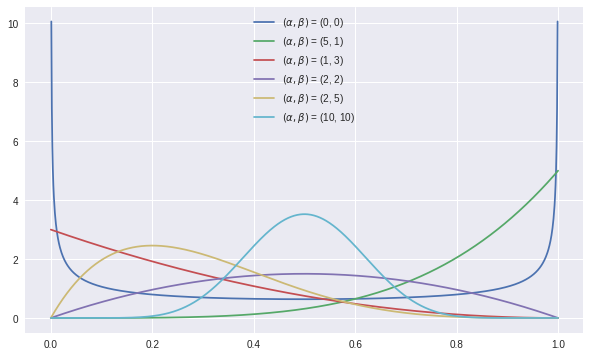

In [12]:
x = np.linspace(0, 1, 1000)
plt.figure(figsize=(10, 6))
for alpha, beta in apr_parametrs:
    plt.plot(x, sts.beta(alpha, beta).pdf(x), label='$(\\alpha, \\beta)$ = (%d, %d)' %(alpha, beta))
plt.legend()

В первом случае наименее вероятны исходы около 0,5

Во втором более вероятны исходы ближе к 1

В третьем более вероятны исходы ближе к 0

В четвертом более вероятны исходы ближе к ~0.2

В последнем случае более вероятно, что монета честная

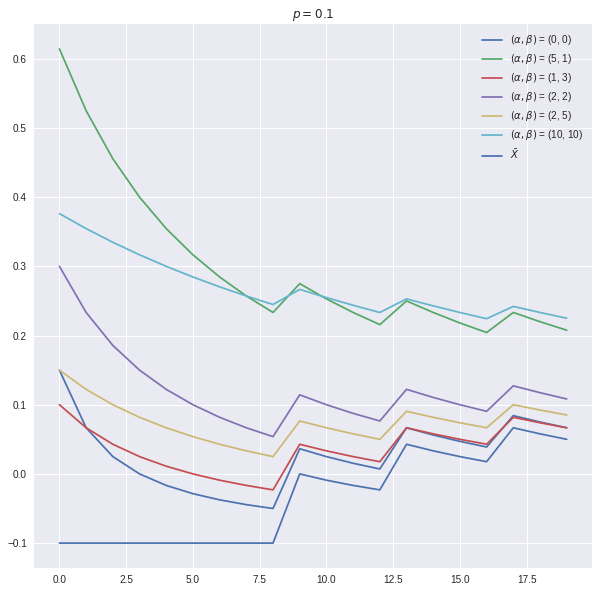

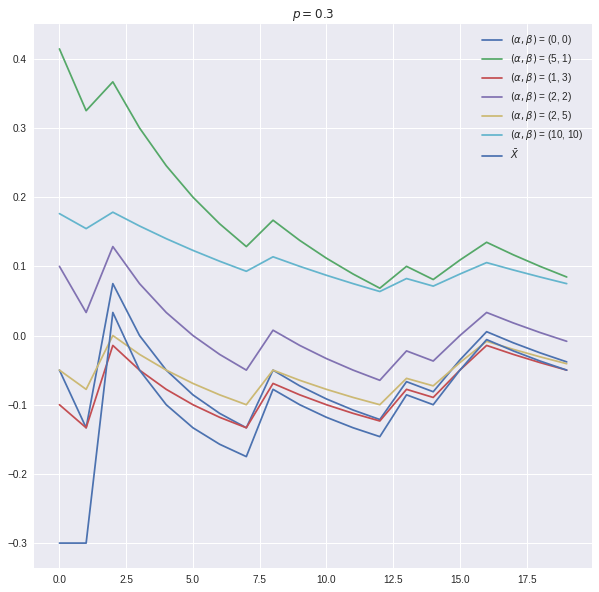

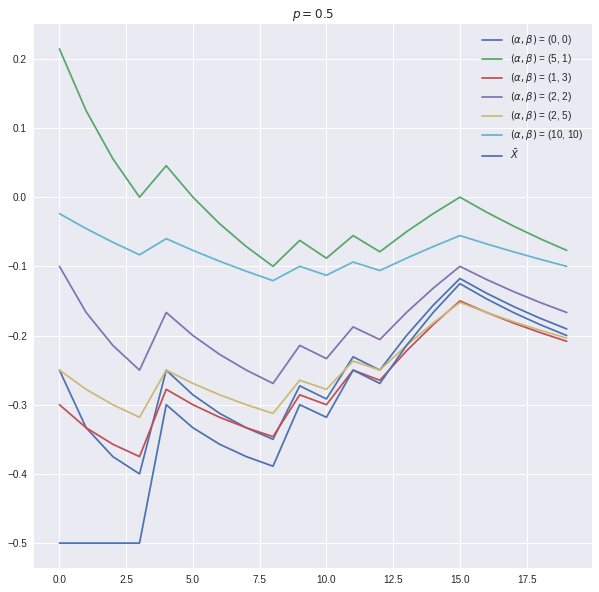

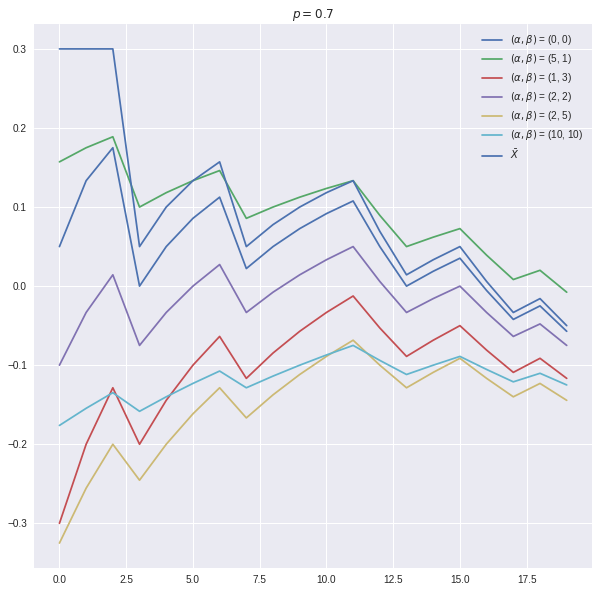

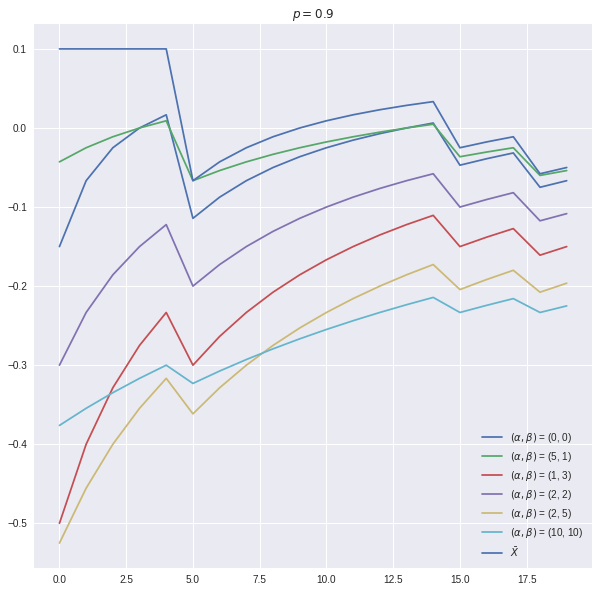

In [15]:
def conj_parametrs(alpha, beta, X):
    return (alpha + sum(X), beta + len(X) - sum(X))

def bayes_est(alpha, beta, X):
    return (alpha + sum(X)) / (alpha + beta + len(X))

for p in p_parametrs:
    bern_dist = sts.bernoulli(p)
    X = np.array(bern_dist.rvs(N))
    plt.figure(figsize=(10, 10))
    plt.subplot()
    plt.title('$p = %.1f$' %(p))
    for alpha, beta in apr_parametrs:
        ests_p = list(map(lambda n: bayes_est(alpha, beta, X[:n]), range(1, N + 1)))
        plt.plot(list(range(N)), np.array(ests_p) - p, label='$(\\alpha, \\beta)$ = (%d, %d)' %(alpha, beta))
    plt.plot(list(range(N)), list(map(lambda n: sum(X[:n]) / n - p, range(1, N + 1))), label='$\\bar{X}$')
    plt.legend()
    plt.show()

Видим, что в зависимости от реального значения параметра разные оценки сходятся по разному, 
но быстрее всего сходятся оценки, распределение которых ближе всего к реальному, как и должно быть.